In [ ]:
# 머신 러닝
# input, label을 활용하여 규칙을 찾게 하는 과정
# 지도 학습 : label이 있다
# - K-NN, Decision Tree, Support Vector Machine
# 비지도 학습 : label이 없다
# 강화 학습 : 보상(reward)을 통해 학습

In [ ]:
# 비지도 학습 *Unsupervised learning
# - label이 없다
# 군집, 차원 축소, 이상 탐지

In [ ]:
# 군집 알고리즘 (Clustering)
# - K-Means Clusering
# 핵심개념 : 사용자가 지정한 K개의 군집을 설정하기 위해
# 중심점을 설정하고, 각 데이터 포인터를 가장 가까운 중심점에 할당

# 순서
# 1) K개의 중심점을 설정
# 2) 할당 : 모든 데이터를 가장 가까운 중심점에 핟아
# 3) 이동 : 각 군집의 중심점을 해당 군집에 속한 데이터들의 평균 위지로 이동

In [17]:
# 1) 임의의 데이터
from sklearn.datasets import make_blobs # 군집용 데이터 생성
from sklearn.cluster import KMeans # 군집 알고리즘

# 속성( 200개 데이터, 2개의 특징, 최종 군집 4개, 군집 표준 편차)
X,y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0, random_state=42)

# 엘보우 기법을 통해서 K를 찾아 나갈건데.....일단 4
k = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init="auto")
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

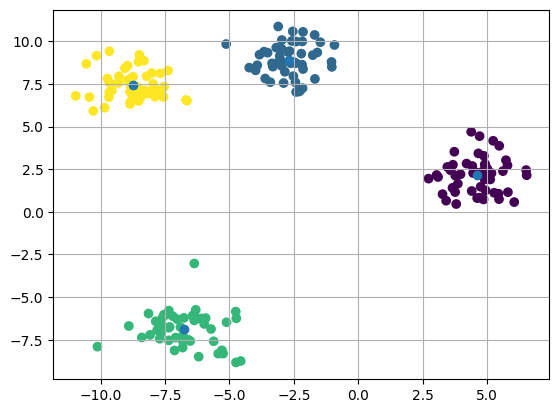

In [18]:
# 각 군집의 중심점 좌표, 군집 label
centors = kmeans.cluster_centers_ # 중심점 좌표
labels = kmeans.labels_           # X의 군집된 결과

# 이 결과를 토대로 시각화
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=labels) # 군집된 데이터 시각화
plt.scatter(centors[:,0], centors[:, 1])
plt.grid(True)                          # 격자 형태
plt.show()

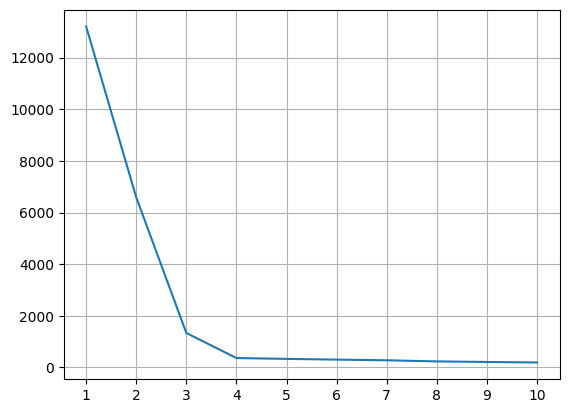

In [22]:
# 엘보우 방법을 이용한 최적의 K 찾기
k_range = range(1,11)

inertia_list = []

for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_) # 군집 내 데이터들과 중심점 사이의 거리


plt.plot(k_range, inertia_list)
plt.grid(True)
plt.xticks(k_range) # x축 격자 확인
plt.show()

In [23]:
# 실제 데이터를 가지고 군집
# 쇼핑몰 고객 데이터
import pandas as pd
df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<function matplotlib.pyplot.show(close=None, block=None)>

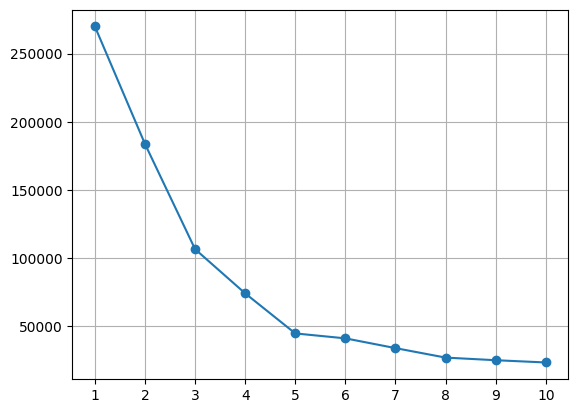

In [30]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X = X.values

# X를 k개로 군집화 시키고 싶다

# 엘보우 방법을 사용해보자 : 그래프 확인 결과 k는 5가 적당
k_range = range(1,11)
inertia_list = []
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_)

plt.plot(k_range, inertia_list, marker="o")
plt.grid(True)
plt.xticks(k_range)
plt.show

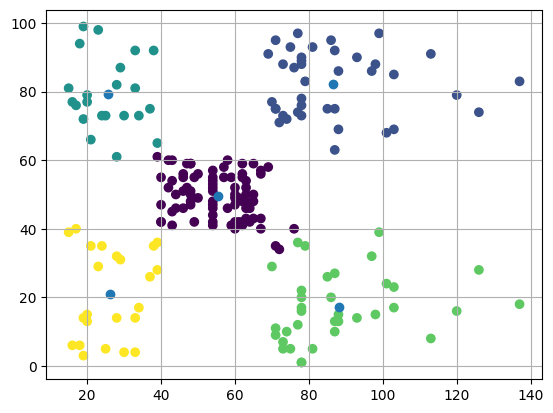

In [31]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto")
kmeans.fit(X)
centors = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(X[:,0], X[:,-1], c=labels)
plt.scatter(centors[:,0], centors[:,1])
plt.grid(True)
plt.show()

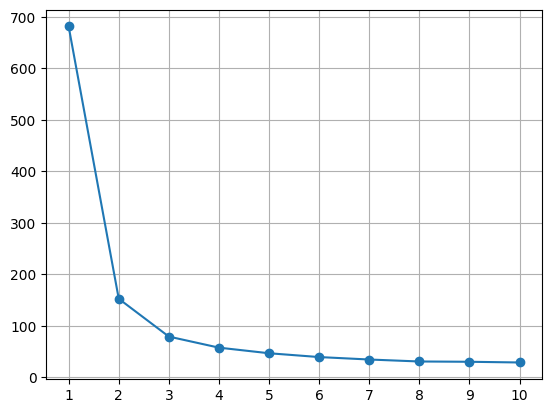

In [34]:
# 지도학습-분류
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset

# 비지도학습-군집
X = iris_dataset.data


k_range = range(1,11)
inertia_list = []
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_)

plt.plot(k_range, inertia_list, marker="o")
plt.grid(True)
plt.xticks(k_range)
plt.show()

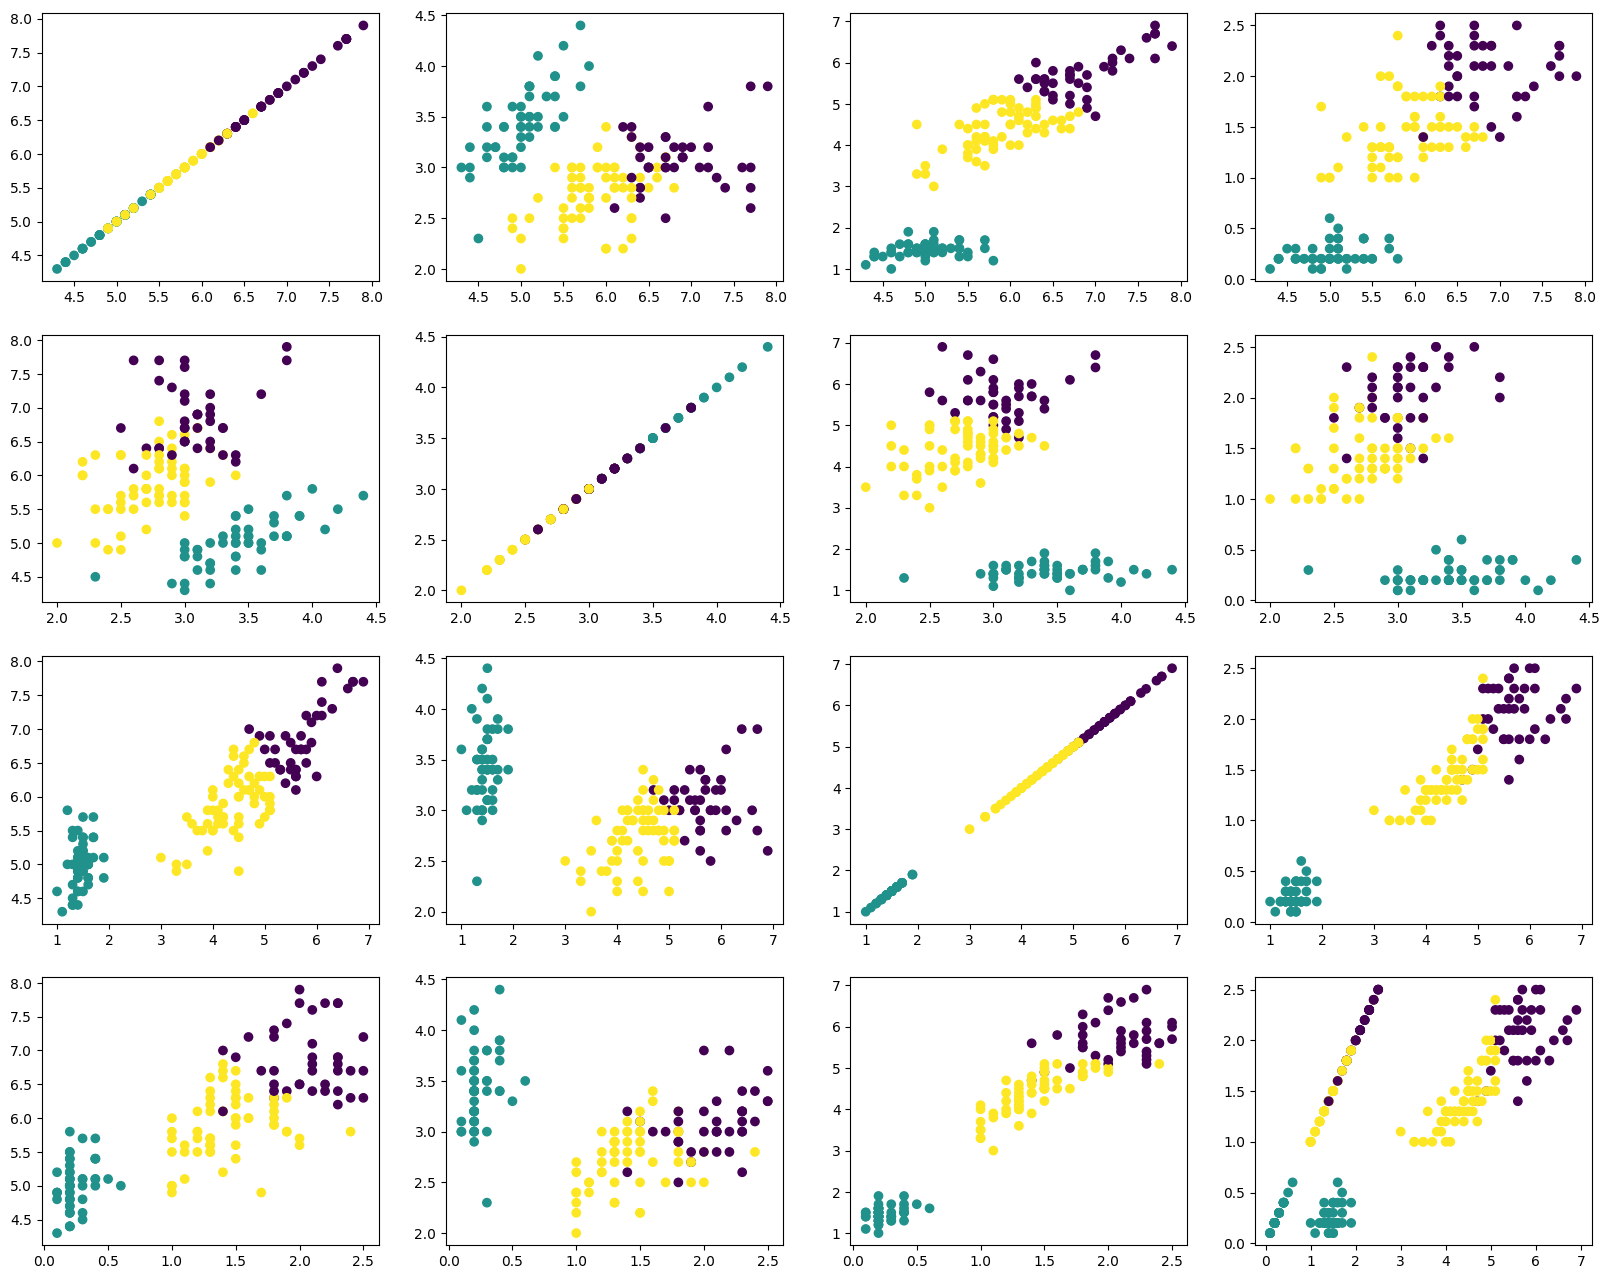

In [47]:
# 엘보우 방범을 통해 k가 3을 확인하였다
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(X)

centors = kmeans.cluster_centers_
labels = kmeans.labels_

fig, axis = plt.subplots(4,4, figsize=(20,16))

for i in range(4):
    for j in range(4):
        axis[i,j].scatter(X[:,i], X[:,j], c=labels)


plt.scatter(X[:,2], X[:,3], c=labels)
plt.show()

In [ ]:
# 다른 형태의 군집되어 있는 데이터를 학습
# 밀도 기반 알고리즘
# DBSCAN(Desity-Based Spatial Clustering of Applications with Noise)
# 밀집되어 있는 영역 기반 군집 알고리즘
# 핵심 개념
# eps(epsilon) : 개별 데이터를 중심으로 하는 원의반경
# min_samples : 하나의 군집으로 인정 받기 위한 최소 샘플 수

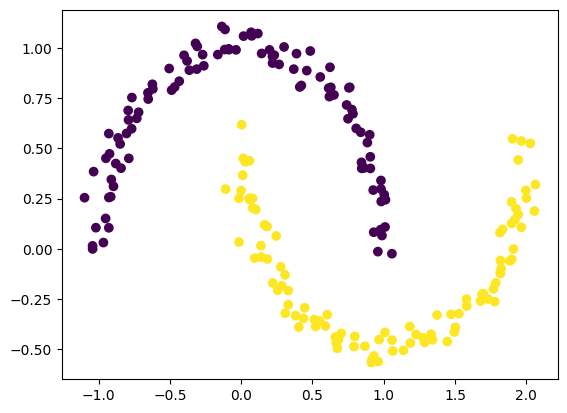

In [51]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X,y = make_moons(n_samples=200, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

In [53]:
# 실제 피지 지진 데이터를 DBSCAN 활요해서 군집

df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/quakes.csv")
df

,rownames,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...,...
995,996,-25.93,179.54,470,4.4,22
996,997,-12.28,167.06,248,4.7,35
997,998,-20.13,184.20,244,4.5,34
998,999,-17.40,187.80,40,4.5,14


In [54]:
df.describe()

,rownames,lat,long,depth,mag,stations
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,-20.642750,179.462020,311.371000,4.620400,33.418000
std,288.819436,5.028791,6.069497,215.535498,0.402773,21.900386
min,1.000000,-38.590000,165.670000,40.000000,4.000000,10.000000
25%,250.750000,-23.470000,179.620000,99.000000,4.300000,18.000000
50%,500.500000,-20.300000,181.410000,247.000000,4.600000,27.000000
75%,750.250000,-17.637500,183.200000,543.000000,4.900000,42.000000
max,1000.000000,-10.720000,188.130000,680.000000,6.400000,132.000000


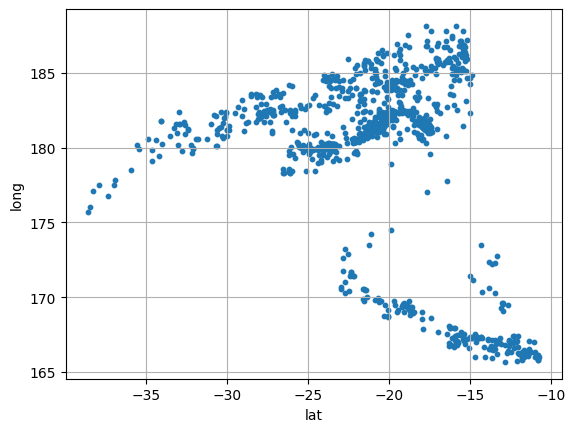

In [60]:
X = df[["lat","long"]]
X = X.values

# 군집하기 전에 시각화를 먼저 해볼까
plt.scatter(X[:,0], X[:,1], s=10) # s=마커사이즈 조정
plt.grid(True)
plt.xlabel("lat")
plt.ylabel("long")
plt.show()

# DBSCAN 사용 시 장점 : 군집 갯수 정하지 않아도 됌
# 단점 : eps를 계산 해야함

<function matplotlib.pyplot.show(close=None, block=None)>

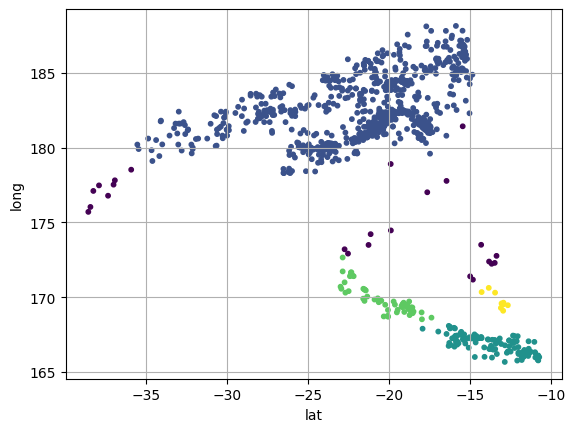

In [66]:
# eps=1.0으로 두고 출발하자
# min_sample=5

dbscan = DBSCAN(eps=1.0, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters, s=10)
plt.xlabel("lat")
plt.ylabel("long")
plt.grid(True)
plt.show

In [69]:
# -1은 노이즈
# 군집 갯수 4개
set(clusters)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

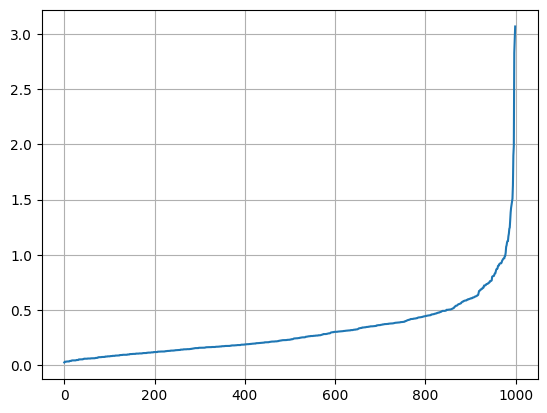

In [76]:
# 안신나는 eps 찾기 모험
# K-distance 알고리즘 활용
# eps, min_samples
# 1) min_samples은 feature 개수 x 2 정도로 설정
# 만약, min_samples을 5로 설정했다면
# 각 점(데이터 포인트)에서 4개의 점 까지 거리 계산
from sklearn.neighbors import NearestNeighbors

k = 4
nn = NearestNeighbors(n_neighbors=k).fit(X)
neighbor = nn.fit(X)
distance, indices = neighbor.kneighbors(X)

# 거리를 가지고 그리프를 그려보자
# 그리기 전에 정렬하자
import numpy as np
dist_sorted = np.sort(distance[:,k - 1], axis=0)
plt.plot(dist_sorted)
plt.grid(True)
plt.show()
# 급격히 기울어지는 지점의 y 축값이 eps

In [85]:
# 데이터를 보고 지도 학습 -> label
# 차원 축소
from sklearn.datasets import load_digits
digits = load_digits()
digits["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

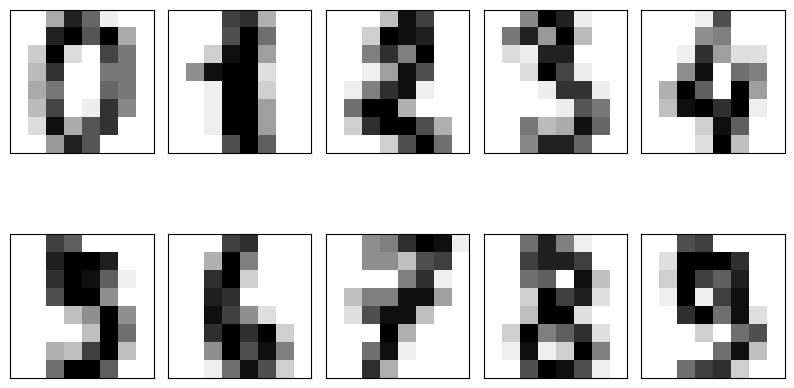

In [93]:
# 시각화

fig, axis = plt.subplots(2,5, figsize=(10,5), subplot_kw={"xticks":[],"yticks":[]},
                        gridspec_kw=dict(hspace=0.4, wspace=0.1))
count = 0

for i in range(2):
    for j in range(5):
        axis[i,j].imshow(digits["images"][count], cmap="binary", interpolation="nearest")
        count += 1

# image = digits["images"][2]

# plt.figure(figsize=(5,5))
# plt.imshow(image, cmap="binary", interpolation="nearest")
plt.show()

In [107]:
# 각 데이터가 64개의 feature를 가지고 있다
# 64개중에서 어떤 feature가 중요한가?
# 차원 축소 : feature를 줄이는 작업
# 조건 : 줄여진 feature들이 원래의 data를 잘 표현해야 함

from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print("원본 데이터의 차원: ", X.shape)

# 차원 축소 후 원래의 데이터를 얼마나 잘 표현

# 차원 축소
# 핵심
# 첫 번째 모델 : 주 성분 분석(PCA, Principal Component Analysis)
# - 원리 : 데이터의 분산이 가장 큰 방향을 새로운 축(주성분)으로 설정하여
#         원본 데이터를 투영

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 64 -> 2차원
X_pca = pca.fit_transform(X)
print("축소된 데이터의 차원:", X_pca.shape)

print("\n축소된 데이터의 주성분이 원본을 얼마나 표현하는지")
print(round(sum(pca.explained_variance_ratio_),2)) # round 소수 2자리까지 출력
# 0.29가 의미하는 내용
# 64차원을 2차원으로 축소했는데
# 해당 2차원 데이터가 원본 29%나 표현하고 있다


원본 데이터의 차원:  (1797, 64)
축소된 데이터의 차원: (1797, 2)

축소된 데이터의 주성분이 원본을 얼마나 표현하는지
0.29


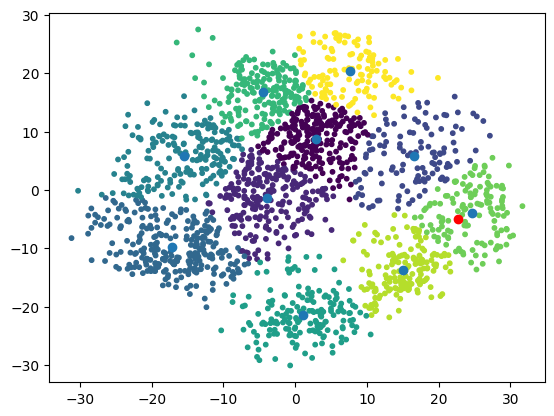

In [119]:
# 군집 사용해서 K-Means
# 10개로 시각화 시켜주실 수 있나요?
# n_init : 중심점 이동하는 횟수
kmeans = KMeans(n_clusters=10, n_init="auto", random_state=42)
kmeans.fit(X_pca)
centors = kmeans.cluster_centers_
labels = kmeans.labels_

# 만약, 새로운 데이터가 들어 왔다
new_data = kmeans.predict(X_pca[100].reshape(1, -1))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10)
plt.scatter(centors[:, 0], centors[:, 1])
plt.scatter(X_pca[100][0], X_pca[100][1], c="red")
plt.show()

In [120]:
# 3) 연관 규칙 분석 (Associaton Rule Mining)
# - 특정 feature들 간에 규칙을 찾아내는 기법

In [1]:
# 1. 전처리된 장바구니 데이터 (총 10개의 거래)
dataset = [
    ['우유', '계란', '빵'],
    ['우유', '기저귀', '맥주', '감자칩'],
    ['계란', '빵', '주스'],
    ['우유', '기저귀', '맥주', '콜라'],
    ['빵', '계란', '우유'],
    ['기저귀', '맥주', '주스'],
    ['빵', '콜라'],
    ['우유', '계란', '빵', '감자칩'],
    ['기저귀', '맥주'],
    ['우유', '빵']
]

In [3]:
type(dataset[0][0])
# 문자열 -> 범주형 데이터
# DataFrame
# 데이터프레임명.info()
# int64, object bool
# 타이타닉 Sex -> male, female -> 상관관계 분석 (X)
# 수치형 데이터가 아니기 때문에

# 간단한 전처리
# 범주형 데이터를 어떻게 전처리 할 것인가
# 1) 레이블 인코딩
item_list = []
for data in dataset:
    for d in data:
        item_list.append(d)
item_list = list(set(item_list))
item_list.sort()
item_list
item_dict = {}

for index, item in enumerate(item_list):
    item_dict[item] = index

# 인코딩 결과
enconded_list = []
for data in dataset:
    temp = []
    for d in data:
        temp.append(item_dict[d])
    enconded_list.append(temp)

enconded_list

[[5, 1, 4],
 [5, 2, 3, 0],
 [1, 4, 6],
 [5, 2, 3, 7],
 [4, 1, 5],
 [2, 3, 6],
 [4, 7],
 [5, 1, 4, 0],
 [2, 3],
 [5, 4]]

In [7]:
# 원-핫 인코딩
# 데이터들을 쭉 나열
# 우유 계란 빵 기저귀 맥주 감자칩
# True True True False False False
# 함수 사용하지 않고 직접 One-Hot Encoding
import pandas as pd
items = []
for data in dataset:
    for d in data:
        items.append(d)
items = list(set(items))
items.sort()

item_dict = {}
for index, item in enumerate(items):
    item_dict[item] = index
# 원-핫 인코딩 진행
enconded_list = []

for data in dataset:
    temp = [0] * len(items)
    for d in data:
        # temp = [0, 0, 0, 0, 0, 0, 0, 0]
        # d : 기저귀
        temp[item_dict[d]] = 1
    enconded_list.append(temp)

df = pd.DataFrame(enconded_list, columns=items)
df.astype(bool)

,감자칩,계란,기저귀,맥주,빵,우유,주스,콜라
0,False,True,False,False,True,True,False,False
1,True,False,True,True,False,True,False,False
2,False,True,False,False,True,False,True,False
3,False,False,True,True,False,True,False,True
4,False,True,False,False,True,True,False,False
5,False,False,True,True,False,False,True,False
6,False,False,False,False,True,False,False,True
7,True,True,False,False,True,True,False,False
8,False,False,True,True,False,False,False,False
9,False,False,False,False,True,True,False,False


In [10]:
# 좀 더 간편하게 One-hot Encoding
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 441.3 kB/s eta 0:00:02
   ----------------------- ---------------- 0.8/1.4 MB 621.2 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 709.1 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 709.1 kB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 709.1 kB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 617.7 kB/s  0:00:02


In [9]:
# 함수를 활용해서 one-hot Encoding 해보자

from sklearn.preprocessing import OneHotEncoder
one_hot_e = OneHotEncoder(sparse_output=False)
result = one_hot_e.fit_transform(enconded_list)
print(result)

[[1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]]


In [14]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
temp = te.fit(dataset).transform(dataset)
df = pd.DataFrame(temp, columns=items)
df

# 3) 연관 규칙 분석
from mlxtend.frequent_patterns import apriori

# support(지지도) : 전체 데이터 중 해당 값이 포함될 확률
freq = apriori(df, min_support=0.2, use_colnames=True)
freq

,support,itemsets
0,0.2,(감자칩)
1,0.4,(계란)
2,0.4,(기저귀)
3,0.4,(맥주)
4,0.6,(빵)
5,0.6,(우유)
6,0.2,(주스)
7,0.2,(콜라)
8,0.2,"(우유, 감자칩)"
9,0.4,"(계란, 빵)"


In [18]:
# 신뢰도
# 우유를 4명이 샀다
# 그 사람들 중 빵을 3명이 샀으면 우유->빵 : 신뢰도가 0.75
from mlxtend.frequent_patterns import association_rules
rulse = association_rules(freq, min_threshold=0.6) # 출력이 많이되서 신뢰도가 60%만 출력
rulse.sort_values(by="lift", ascending=False) # lift 기준 오름차순 True=내림차순

# lift : 무연히 2개의 물품을 동시에 샀다면 lift 낮다
# 식제 연관성이 있으면 lift가 높다
# 귀저기 -> 맥주 lift가 2.5
# 기저귀가 산 사람은 귀저기를 사지 않은 사람보다 맥주를 구입할 확률 250%

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(맥주),(기저귀),0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
5,(기저귀),(맥주),0.4,0.4,0.4,1.000000,2.500000,1.0,0.24,inf,1.000000,1.000000,1.000000,1.000000
13,"(기저귀, 우유)",(맥주),0.2,0.4,0.2,1.000000,2.500000,1.0,0.12,inf,0.750000,0.500000,1.000000,0.750000
12,"(맥주, 우유)",(기저귀),0.2,0.4,0.2,1.000000,2.500000,1.0,0.12,inf,0.750000,0.500000,1.000000,0.750000
11,(계란),"(우유, 빵)",0.4,0.4,0.3,0.750000,1.875000,1.0,0.14,2.4,0.777778,0.600000,0.583333,0.750000
10,"(우유, 빵)",(계란),0.4,0.4,0.3,0.750000,1.875000,1.0,0.14,2.4,0.777778,0.600000,0.583333,0.750000
8,"(계란, 우유)",(빵),0.3,0.6,0.3,1.000000,1.666667,1.0,0.12,inf,0.571429,0.500000,1.000000,0.750000
2,(빵),(계란),0.6,0.4,0.4,0.666667,1.666667,1.0,0.16,1.8,1.000000,0.666667,0.444444,0.833333
0,(감자칩),(우유),0.2,0.6,0.2,1.000000,1.666667,1.0,0.08,inf,0.500000,0.333333,1.000000,0.666667
1,(계란),(빵),0.4,0.6,0.4,1.000000,1.666667,1.0,0.16,inf,0.666667,0.666667,1.000000,0.833333


In [37]:
# 실제 데이터를 통해 분석
url = "https://github.com/nayeho/robot/raw/refs/heads/main/groceries.csv"

# url에서 실제 데이터를 직접 불러오기 위해
import urllib.request as urq

groceries = []
with urq.urlopen(url) as file:
    for row in file:
        row_list = row.decode("utf-8").strip().split(",")
        groceries.append(row_list)
groceries[:3]

# 1) One-Hot Encoding 통해서 전처리
te = TransactionEncoder()
arr = te.fit(groceries).transform(groceries)
df =pd.DataFrame(arr, columns=te.columns_)
df


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
# 2) 연관 규칙 분석 지지도, 신뢰도, lift
freq = apriori(df, min_support=0.01, use_colnames=True)
freq.sort_values(by="support", ascending=False)

,support,itemsets
86,0.255516,(whole milk)
55,0.193493,(other vegetables)
66,0.183935,(rolls/buns)
75,0.174377,(soda)
87,0.139502,(yogurt)
...,...,...
160,0.010066,"(rolls/buns, curd)"
236,0.010066,"(waffles, other vegetables)"
212,0.010066,"(napkins, tropical fruit)"
199,0.010066,"(hard cheese, whole milk)"


In [40]:
# 3) 신뢰도 계산
rules = association_rules(freq, metric="lift", min_threshold=1.5)
rules.sort_values(by="confidence", ascending=False)

# 1) Support
# (citrus fruit, root vegetables)를 구매한 사람은 0.010371 (1%)
# (other vegetables)를 구매한 사람은 0.193493 (19%)

# 2) confience
# (citrus fruit, root vegetables)를 구매한 사람중 (other vegetables)를 구매할 확률은 0.584541 (58%)

# 3) lift
# (citrus fruit, root vegetables)를구매한 사람은 일반사람보다 (other vegetables)를 구매할 확률이 3배 더 높다

# 4) 결론
# 같이두자

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
223,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,1.0,0.006948,1.949059,0.681990,0.051646,0.486932,0.319903
289,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,1.0,0.008231,1.941244,0.683367,0.060835,0.484867,0.324062
240,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,1.0,0.005649,1.782567,0.571107,0.038313,0.439011,0.310874
216,"(butter, other vegetables)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,1.0,0.006371,1.745992,0.565878,0.043512,0.427260,0.309285
357,"(root vegetables, tropical fruit)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,1.0,0.006620,1.731553,0.563627,0.045350,0.422484,0.308502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,(whole milk),"(other vegetables, fruit/vegetable juice)",0.255516,0.021047,0.010473,0.040987,1.947371,1.0,0.005095,1.020792,0.653456,0.039358,0.020368,0.269286
239,(whole milk),"(yogurt, citrus fruit)",0.255516,0.021657,0.010269,0.040191,1.855768,1.0,0.004736,1.019310,0.619408,0.038476,0.018944,0.257185
274,(whole milk),"(pork, other vegetables)",0.255516,0.021657,0.010168,0.039793,1.837394,1.0,0.004634,1.018887,0.612170,0.038081,0.018537,0.254638
127,(whole milk),(hard cheese),0.255516,0.024504,0.010066,0.039395,1.607682,1.0,0.003805,1.015502,0.507716,0.037288,0.015265,0.225092
